# Calculating and plotting confidence intervals

In [1]:
%matplotlib inline

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# we wouldn't actually use seaborn
# but it makes the plots nicer.
import seaborn as sns
sns.set(color_codes=True)

The formula for confidence interval for a sample taken from a population with a known standard deviation is: $$(\bar{x} - z^*\frac{\sigma}{\sqrt{n}}, \bar{x} + z^*\frac{\sigma}{\sqrt{n}})$$

where $\sigma$ is the population standard deviation, $n$ is the sample size, $\frac {\sigma} {\sqrt{n}}$ is the standard error and $\bar{x}$ is the sample mean.

$z^*$ is simply the Z-score of the upper limit (or lower limit) of the interval. How to calculate $z^*$? 

Let say we are interested in finding the 93% confidence interval. In other words, we are  intrerested in finding upper and lower limits of the normal distribution which include 93% percent of all observations. 

We need to exclude the distribution's upper and lower ends. Since the distribution is symmetric, we can calculate the margins which we want to exclude:

In [2]:
target_confidence = 0.93
margin = (1 - target_confidence)/2

upper_limit = 1 - margin
lower_limit = margin

print('Margin size: {: 0.3f}%'.format(margin))
print('Upper limit: {: 0.3f}%'.format(upper_limit))
print('Upper limit: {: 0.3f}%'.format(lower_limit))

Margin size:  0.035%
Upper limit:  0.965%
Upper limit:  0.035%


The $z^*$ score of the upper limit of the interval should be the Z-score which holds 96.5%

In [3]:
z_star = norm.ppf(upper_limit)
print('z* = {:0.4}'.format(z_star))


z* = 1.812


The $z^*$ score of the lower limit of the interval should be the Z-score which holds 3.5%, but since the distribution is symmetric the $z^*$-score of the lower limit is always the negative of the upper limit:

In [4]:
print('lower z* = {:0.4} = -z* upper'.format(norm.ppf(lower_limit)))

lower z* = -1.812 = -z* upper


So instead of using upper and lower $z^*$ we just use the upper $z^*$ and plug its value to the equation. 

## Some plotting
This is an example of how to plot the confidence interval:

In [5]:
z_lower = norm.ppf(0.001)  # the 0.001 quantile  
z_upper = norm.ppf(0.999)  # the 0.909 quantile
z_range = np.arange(z_lower, z_upper, 0.01)

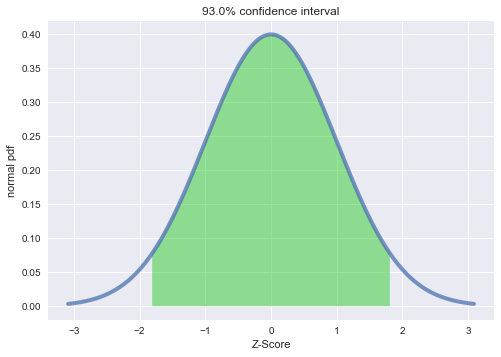

In [10]:
y = norm.pdf(z_range, loc=0, scale=1)

plt.plot(z_range, y,'b-',
         linewidth=4.0, 
         alpha=0.75)

plt.fill_between(z_range, 0, y, 
                 where= (z_range > -z_star) * (z_range < z_star), 
                 facecolor='limegreen', alpha=0.5)

plt.title('{}% confidence interval'.format(target_confidence*100))
plt.xlabel('Z-Score')
plt.ylabel('normal pdf')